# PREPARATION

## import librairies

In [1]:
# Indispensables
import pandas as pd
import numpy as np
#import geopandas as gpd
#import math

# general
import os
from os import listdir
#from os.path import isfile, join
#from os import walk
import sys
import io
import glob
import platform
#
print(os.name, "\n", platform.system(), "\n", platform.release())
#
import argparse
#from datetime import datetime
#import h5py
#import importlib

# VISU
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
#from matplotlib.colors import LogNorm

# IMAGES
#from IPython.display import Image, IFrame
#from PIL import Image
#import rasterio
import imageio

import colorsys

print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)
#print('Geo Panda version: %s' % gpd.__version__)

%matplotlib inline

nt 
 Windows 
 8.1
Panda version: 0.25.1
Numpy version: 1.16.5


In [317]:
from __future__ import print_function

# Machine Lerning
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation     #LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras import backend as K
from keras.callbacks import History

from keras.optimizers import SGD
from keras.regularizers import l2

print('TensorFlow: %s' % tf.__version__)
print('Keras: %s' % keras.__version__)

TensorFlow: 2.0.0
Keras: 2.3.1


## Déclaration des directories et variables

In [5]:
BASE_DIR = os.getcwd()

separe = "/"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR  = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/"
    DATA_DIR2 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA2/"
    DATA_DIR3 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR  = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/"
    DATA_DIR2 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA2/"
    DATA_DIR3 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    DATA_DIR3 = "C:\\Users\\STG3841\\Mes Documents (local)\\travail\\"
    separe = "\\"   
    
DALLE_NUM = DATA_DIR + "DallesNumPoints5m" + separe
DALLE_ECA = DATA_DIR + "DallesEcartZ5m" + separe
DALLE_POS = DATA_DIR + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: C:\Users\STG3841\Mes Documents (local)\travail
Data ROOT directory: S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\


['C:\\Users\\STG3841\\Mes Documents (local)\\travail',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\python37.zip',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\DLLs',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3',
 '',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\STG3841\\.ipython',
 'S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\',
 'S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\DallesNumPoints5m\\']

## création des listes d'images

In [6]:
#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_1 = [f for f in glob.glob(DALLE_NUM + separe + "*.tif", recursive=True)]#   #only first N for test
liste_2 = [f for f in glob.glob(DALLE_ECA + separe + "*.tif", recursive=True)]#
liste_3 = [f for f in glob.glob(DALLE_POS + separe + "*.tif", recursive=True)]#
print(len(listdir(DALLE_NUM)), len(liste_1), len(liste_2), len(liste_3))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

58776 29384 29384 29384
58776 58775 58768


# DONNEES

## TEST:  Lecture des images

## lecture/creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [7]:
# Intialisation des variables de la dalle
fich_lamp  = DATA_DIR  + "LampadairePresence_0_1_5m.asc"
fich_lamp2 = DATA_DIR2 + "listepositif.xlsx"

header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
print(lampadaires.sum().head(5))
print(lampadaires.nunique().agg(['mean','count','sum']))
##################################
# reconstruit le tableau dans le bon schéma usuel
# calcule la transposee
lampadaires = lampadaires.T
# inversion des colonnes (nombre pair de colonnes, mais pas nécessaire)
lampadaires = lampadaires[lampadaires.columns[::-1]]
##################################
lampes0 = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))

lampes2 = pd.read_excel(fich_lamp2, header=0, skiprows=0)
print(lampadaires.shape, lampes0.shape, lampes2.shape)
#print(lampadaires.describe())
print(lampadaires.sum().sum())
lampes2.head(5)

Bord inférieur gauche: 2042500 7272000 200 200 5
0    3.0
1    4.0
2    6.0
3    2.0
4    1.0
dtype: float64
mean       1.79
count    200.00
sum      358.00
dtype: float64
(200, 200) (40000, 1) (355, 5)
357.0


,_column,_row,_overlaps,posX,posY
0,0,80,1,2042502,7272402
1,0,92,1,2042502,7272462
2,0,102,1,2042502,7272512
3,0,106,1,2042502,7272532
4,0,169,1,2042502,7272847


## rempli le dataframe lampes0 et lampes1

In [8]:
lampes0['NumI'] = lampes0.index
lampes0['NumY'] = lampes0['NumI'].mod(other=n_col)
lampes0['NumX'] = ((lampes0['NumI'] - n_row + 1) / n_row).apply(np.ceil)
#lampes = lampes.drop(['Num'], axis=1)
lampes0.rename(columns={0: 'present'}, inplace=True)
lampes0 = lampes0.astype({'present': 'int8'}, copy=False)
lampes0 = lampes0.astype({'NumY': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumI': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumX': 'int32'}, copy=False)
print(lampes0.dtypes)
#print(lampes.describe(include='all'))
lampes0['X'] = xlow + lampes0['NumX'] * cell_size
lampes0['Y'] = ylow + lampes0['NumY'] * cell_size
lampes0['nom_NUM'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_NumPoints5m.tif"
lampes0['nom_ECA'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) + "_EcartZ5m.tif"
lampes0['nom_POS'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_Position5m.tif"
# extraction des lampadaires
lampes1 = lampes0[lampes0['present'] > 0]
print("Dalle:", lampes0.shape, "Nbre lampadaires:", lampes1.shape)
lampes0.head()

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object
Dalle: (40000, 9) Nbre lampadaires: (357, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif
2,0,2,2,0,2042500,7272010,2042500_7272010_NumPoints5m.tif,2042500_7272010_EcartZ5m.tif,2042500_7272010_Position5m.tif
3,0,3,3,0,2042500,7272015,2042500_7272015_NumPoints5m.tif,2042500_7272015_EcartZ5m.tif,2042500_7272015_Position5m.tif
4,0,4,4,0,2042500,7272020,2042500_7272020_NumPoints5m.tif,2042500_7272020_EcartZ5m.tif,2042500_7272020_Position5m.tif


In [9]:
lampes1.tail(8)

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
39336,1,39336,136,196,2043480,7272680,2043480_7272680_NumPoints5m.tif,2043480_7272680_EcartZ5m.tif,2043480_7272680_Position5m.tif
39384,1,39384,184,196,2043480,7272920,2043480_7272920_NumPoints5m.tif,2043480_7272920_EcartZ5m.tif,2043480_7272920_Position5m.tif
39520,1,39520,120,197,2043485,7272600,2043485_7272600_NumPoints5m.tif,2043485_7272600_EcartZ5m.tif,2043485_7272600_Position5m.tif
39570,1,39570,170,197,2043485,7272850,2043485_7272850_NumPoints5m.tif,2043485_7272850_EcartZ5m.tif,2043485_7272850_Position5m.tif
39577,1,39577,177,197,2043485,7272885,2043485_7272885_NumPoints5m.tif,2043485_7272885_EcartZ5m.tif,2043485_7272885_Position5m.tif
39685,1,39685,85,198,2043490,7272425,2043490_7272425_NumPoints5m.tif,2043490_7272425_EcartZ5m.tif,2043490_7272425_Position5m.tif
39756,1,39756,156,198,2043490,7272780,2043490_7272780_NumPoints5m.tif,2043490_7272780_EcartZ5m.tif,2043490_7272780_Position5m.tif
39763,1,39763,163,198,2043490,7272815,2043490_7272815_NumPoints5m.tif,2043490_7272815_EcartZ5m.tif,2043490_7272815_Position5m.tif


In [10]:
print(lampes1.shape, lampes0.shape)
lampes1.head(240).tail(20)


(357, 9) (40000, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
27731,1,27731,131,138,2043190,7272655,2043190_7272655_NumPoints5m.tif,2043190_7272655_EcartZ5m.tif,2043190_7272655_Position5m.tif
27747,1,27747,147,138,2043190,7272735,2043190_7272735_NumPoints5m.tif,2043190_7272735_EcartZ5m.tif,2043190_7272735_Position5m.tif
28103,1,28103,103,140,2043200,7272515,2043200_7272515_NumPoints5m.tif,2043200_7272515_EcartZ5m.tif,2043200_7272515_Position5m.tif
28125,1,28125,125,140,2043200,7272625,2043200_7272625_NumPoints5m.tif,2043200_7272625_EcartZ5m.tif,2043200_7272625_Position5m.tif
28131,1,28131,131,140,2043200,7272655,2043200_7272655_NumPoints5m.tif,2043200_7272655_EcartZ5m.tif,2043200_7272655_Position5m.tif
28193,1,28193,193,140,2043200,7272965,2043200_7272965_NumPoints5m.tif,2043200_7272965_EcartZ5m.tif,2043200_7272965_Position5m.tif
28256,1,28256,56,141,2043205,7272280,2043205_7272280_NumPoints5m.tif,2043205_7272280_EcartZ5m.tif,2043205_7272280_Position5m.tif
28393,1,28393,193,141,2043205,7272965,2043205_7272965_NumPoints5m.tif,2043205_7272965_EcartZ5m.tif,2043205_7272965_Position5m.tif
28463,1,28463,63,142,2043210,7272315,2043210_7272315_NumPoints5m.tif,2043210_7272315_EcartZ5m.tif,2043210_7272315_Position5m.tif
28464,1,28464,64,142,2043210,7272320,2043210_7272320_NumPoints5m.tif,2043210_7272320_EcartZ5m.tif,2043210_7272320_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [837]:
from keras.preprocessing.image import load_img, save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

off = 200000
if off > 40000:
    off = len(liste_1)
NN = 0
NM = NN + off

dal1 = ['nom_NUM', 'nom_ECA', 'nom_POS']
dal2 = [DALLE_NUM, DALLE_ECA, DALLE_POS]
listes = [liste_1, liste_2, liste_3]
data = ['data1', 'data12', 'data3']
#### Pour eviter les fichiers manquants
# Compare les deux SETS (impossible avec des listes)
for m in range(1,4):
    print("M:", m)
    set_A = set(dal2[m-1] + lampes1[dal1[m-1]])
    set_B = set(listes[m-1])
    set_C1 = set_A & set_B
    set_C2 = set_B - set_A
    liste_C = list(set_C2)
    liste_extraite = list(liste_C[NN:NM]) + list(set_C1)
    #liste_extraite = list(set(list(liste_1[NN:NM]) + list(set_C1)))
    print(len(set_B), len(set_A), len(set_C1), len(set_C2), len(liste_1), len(liste_extraite))

    test = False
    # creation du tenseur resultant ... merge tous les fichiers images
    if test:
    #  Ne fonctionne pas np.array(load_img(fname)) for fname in list_lamp0
        data[m-1] = np.array([np.array(imageio.imread(fname)) for fname in liste_extraite])
        data[m-1].shape
        fichier = DATA_DIR3 + "data_LAS_" + str(dal1[m-1]) + "_" + str(off) + ".npy"
        np.save(fichier, data[m-1])

    liste_y1 = [ 0 for x in range(len(liste_C[NN:NM]))]
    liste_y2 = [ 1 for x in range(len(list(set_C1)))]
    liste_y = liste_y1 + liste_y2
    print(len(liste_y1), len(liste_y2),len(liste_y))


M: 1
29384 357 352 29032 29384 29384
29032 352 29384
M: 2
29384 357 352 29032 29384 29384
29032 352 29384
M: 3
29384 357 352 29032 29384 29384
29032 352 29384


### Lecture de TOUS les fichiers
5s pour 100 fichiers

~45mn ???    pour 40000 fichiers

### création de la table de 200-300 colonnes

In [ ]:
#  limitation à XXX valeurs

NN = 0
NM = NN + off

n_row2 =  10   #TODO mettre le produit des dimension de la matrice image
n_col2 =  10
N2 = n_row2*n_col2  # N=100

#################################################
#################################################
###   TODO ... regarder l'unicité des 2 listes
#################################################
#################################################

### assemble 2 listes (lampadaires totale + NM * valeurs au hazard ... fichiers unique)
#list_lamp0 = list(set(lampes0['nom_NUM'][NN:NM] + list(DALLE_NUM + list_lamp1)))
list_lamp0 = list(DALLE_NUM + lampes0['nom_NUM'][NN:NM]) + list(DALLE_NUM + lampes1['nom_NUM'])
list_lamp0b = list(lampes0['present'][NN:NM]) + list(lampes1['present'])
#lamp0 = np.array(list_lamp0b)
list_lamp1 = list(DALLE_NUM + lampes1['nom_NUM'])
list_lamp2 = list(DALLE_ECA + lampes1['nom_ECA'])
print(list_lamp0[:2])
print(list_lamp0b[:2])
#print(list_lamp1[:2])
#print(list_lamp2[:2])
print(len(list_lamp0), len(list_lamp0b), len(list_lamp1), len(list_lamp2))

i=0
for n,fich1 in enumerate(list_lamp0):
    if n%500 == 0:
        print(n, list_lamp0b[n])
    fich2 = fich1.replace("NumPoints5m", "EcartZ5m")
    #fich3 = fich1.replace("NumPoints5m", "Position5m")
    #fiche3 = DALLE_POS+fich3
    
# fichiers dalles manquantes ???? ... pourquoi ?????
    if os.path.exists(fich1) and os.path.exists(fich2):    # Manque des fichiers sur les 40000
        i += 1
        if i%1000 == 0:
            print(n, i, list_lamp0b[n])
        data1 = np.reshape(imageio.imread(fich1), N2) #.flatten()
        data1T = np.expand_dims(data1, axis=0)
        data2 = np.reshape(imageio.imread(fich2), N2)
        data2T = np.expand_dims(data2, axis=0)
        #data3 = np.reshape(imageio.imread(fiche3), N2)
        #data3T = np.expand_dims(data3, axis=0)
        #print(i, data1T.shape, data2T.shape, data3T.shape)
        df_int1 = pd.DataFrame(data1T, index=[i])  #, index=indices)
        df_int2 = pd.DataFrame(data2T, index=[i])  
        #df_int3 = pd.DataFrame(data3T, index=[i])
        # MERGE 
        #df_inta = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        #df_int = df_inta.merge(df_int3, left_index=True, right_index=True)
        df_int = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        df_int['label'] = list_lamp0b[n]    #
        if i == 1:
            #print(dataT)
            df3 = df_int
        else:
            df3 = pd.concat([df3, df_int])
    else:
        pass     #print(fiche1, fich2)
if i > 0:
    print(n+1, i, n+1-i, df3.shape, df3.shape[0]/i)

# change pour des entiers et pas des nombres flottant 
for n in range(0,N2):
    df3 = df3.astype({str(n)+'_num': 'int8'}, copy=False)
#print(df3.dtypes)
df3

#  TODO rajouter une colonne de présence ( comparer avec SORTIE :  0 ou 1)
#####################################################
#  remplir une colonne de zéro
#  puis boucler sur les N=357 valeurs pour indiquer la présence d'un lampadaire
#####################################################
#  puis faire 100 sorties 0-1 pour  les 100 positions

In [ ]:
df3_total = df3.copy()

test = df3_total.describe()[:3].T
test['val'] = (test['count'] * test['mean'])
test

In [ ]:
test = False
# Sauvegarde du fichier total 

if test:
    fileSAVE = DATA_DIR3 + "donnees_LAS_1k_1k.csv"
    #fileSAVE = DATA_DIR3 + "donnees_IMAC_LAS_1k_1k.csv"
    df3.to_csv(fileSAVE, index=False)

print(df3_total.shape)

# KERAS - TENSORFLOW

## Lecture du fichier de données

In [311]:
print(tf.keras.datasets)
if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    df4 = pd.read_csv(DATA_DIR3 + "donnees_IMAC_LAS_1k_1k.csv")
else:
    df4 = pd.read_csv(DATA_DIR3 + "donnees_LAS_1k_1k.csv")
print(df4.shape)
df4.head()

<module 'tensorflow_core.keras.datasets' from 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\__init__.py'>
(29736, 201)


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
0,0,0,0,0,0,0,0,6,3,1,...,0.55,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0
1,0,0,0,0,4,3,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.3,0.0,0
2,1,2,1,1,0,1,0,0,0,0,...,0.00,0.00,0.00,0.67,0.17,0.58,0.0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.17,0.35,0.77,0.00,0.00,0.00,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0


### Changement de la classe en categorial

In [380]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
X = df4.iloc[:,:-1]
y = df4.iloc[:,-1]
y_binary = to_categorical(y)

### Séparation Train - Test

In [425]:
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#    X, y, test_size=0.2, random_state=42, stratify=y)

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape, y_binary.shape, y.shape)

(23788, 200) (23788, 2) (5948, 200) (5948, 2) (29736, 2) (29736,)


## Création d'un Modèle Réseau de Neurone "SIMPLE"

In [414]:
print("train", train_data.shape, test_data.shape)
print(train_labels.shape)

train (23788, 200) (5948, 200)
(23788, 2)


In [426]:
#Nomb_Input = 200
fil_M = 32    # 512-256-128-64-32 ?
kernel = 3
epochs = 10
batch_size = 32
n_dens = 50  # 100 ou 200?

num_class = 2   # ou ce

# redimensionnement nécesaire pour la convolution
train_data = np.expand_dims(train_data, axis=2)
#   ou  ?  train_data.reshape(train_data.shape[0], train_data.shape[1], 1)  et input_shape=(train_data.shape[1], 1)
test_data = np.expand_dims(test_data, axis=2)

model0 = Sequential()
model0.add(Conv1D(fil_M, kernel, activation='relu', input_shape=(train_data.shape[1],train_data.shape[2])))
#model0.add(Conv1D(fil_M, kernel, activation='relu'))
#model0.add(Dropout(0.5))
model0.add(MaxPooling1D(pool_size=(2)))
# model0.add(BatchNormalization())
model0.add(Flatten())        
model0.add(Dense(n_dens, activation='relu'))
model0.add(Dense(num_class, activation='sigmoid'))

model0.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model0.summary()

history0 = model0.fit(train_data, train_labels, validation_split=0.33, verbose=2, epochs=epochs, batch_size=batch_size)


Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_43 (Conv1D)           (None, 198, 32)           128       
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 99, 32)            0         
_________________________________________________________________
flatten_74 (Flatten)         (None, 3168)              0         
_________________________________________________________________
dense_162 (Dense)            (None, 50)                158450    
_________________________________________________________________
dense_163 (Dense)            (None, 2)                 102       
Total params: 158,680
Trainable params: 158,680
Non-trainable params: 0
_________________________________________________________________
Train on 15937 samples, validate on 7851 samples
Epoch 1/10
 - 7s - loss: 0.1266 - accuracy: 0.9752 - val_loss: 0

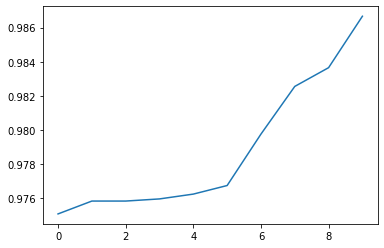

In [427]:
history0 = history0b
#history0.history
# plot metrics
test = False
if test:
    _ = plt.plot(history0.history['msle'])
    _ = plt.plot(history0.history['mean_squared_error'])
    _ = plt.plot(history0.history['binary_accuracy'])
    _ = plt.plot(history0.history['categorical_accuracy'])
_ = plt.plot(history0.history['accuracy'])
_ = plt.show()

In [428]:
model0.summary()

# model.save_weights('file.h5')

# avec le model construit + les poids
# model.load_weights('file.h5')


Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_43 (Conv1D)           (None, 198, 32)           128       
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 99, 32)            0         
_________________________________________________________________
flatten_74 (Flatten)         (None, 3168)              0         
_________________________________________________________________
dense_162 (Dense)            (None, 50)                158450    
_________________________________________________________________
dense_163 (Dense)            (None, 2)                 102       
Total params: 158,680
Trainable params: 158,680
Non-trainable params: 0
_________________________________________________________________


### Figures

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


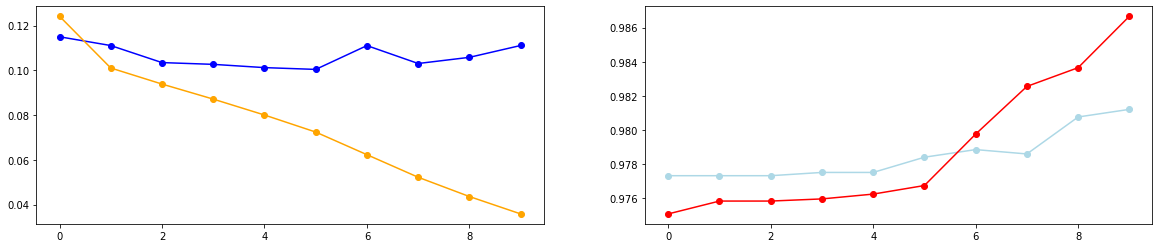

In [429]:
print(history0.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    _ = plt.plot(list(history0.history.values())[i],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history0.history.values())[j],'k-o', color=coul[j])

In [430]:
print(history0.history.keys())
print(history0.history['val_accuracy'][-1])
print(history0.history['accuracy'][-1])
print(history0.history['val_loss'][-1])
print(history0.history['loss'][-1])


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
0.9812125563621521
0.98666626
0.11107659498861892
0.0358407639080684


Test loss: 0.10286678752198655
Test accuracy: 0.9783120155334473
[0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


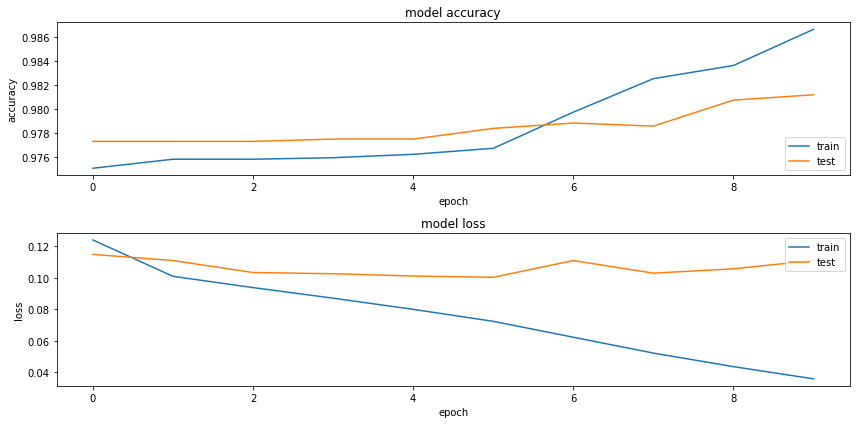

In [431]:
# RESULTATS
score = model0.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model0.predict(test_data, batch_size=batch_size)
predictions = model0.predict(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history0.history['accuracy'])
_ = plt.plot(history0.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history0.history['loss'])
_ = plt.plot(history0.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de Confusion

Echantillon Test: 5948
Echantillon Train: 23788
Prédit       0.0       1.0
Reel                      
0.0     0.996556  0.141844
1.0     0.018770  0.226950
Predit   0.0  1.0   All
Reel                   
0.0     5787   20  5807
1.0      109   32   141
All     5896   52  5948


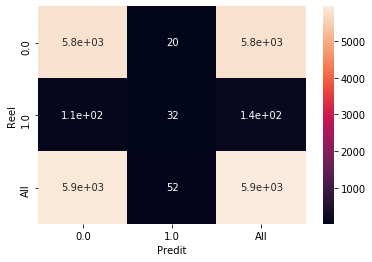

Predit       0.0       1.0  All
Reel                           
0.0     0.498278  0.001722  0.5
1.0     0.386525  0.113475  0.5
All     0.495629  0.004371  0.5


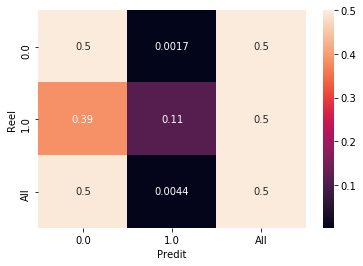

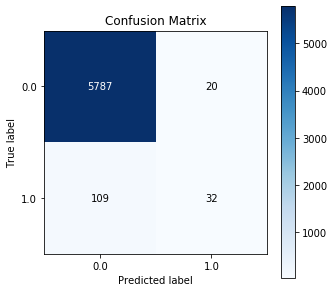

In [432]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
Y11 = pd.DataFrame(model0.predict(test_data)[:,1:])[0].round(0).tolist()
Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
print("Echantillon Test:", len(Y11))
confusion_matrix(Y11, Y10)

Y01 = pd.DataFrame(model0.predict(train_data)[:,1:])[0].round(0).tolist()
Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
print("Echantillon Train:", len(Y01))
confusion_matrix(Y01, Y00)

y_reel = pd.Series(Y10, name='Reel')
y_pred = pd.Series(Y11, name='Prédit')

df_confusion = pd.crosstab(y_reel, y_pred)

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel'], colnames=['Predit'], margins=True)
print(df_confusion)
_ = sns.heatmap(df_confusion, annot=True)
plt.show()

df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print(df_conf_norm)
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

######### NOT WORKING ???
#from pandas_ml import ConfusionMatrix
#confusion_matrix = ConfusionMatrix(y_reel, y_pred)
#confusion_matrix.plot()
#plt.show()
#confusion_matrix.plot(normalized=True)
#plt.show()

#binary_confusion_matrix = ConfusionMatrix(y_true, y_pred)
#print("Binary confusion matrix:\n%s" % binary_confusion_matrix)
#print(binary_confusion_matrix.TP) # TN, FP, FN, ...
#binary_confusion_matrix.plot(normalized=False)
#binary_confusion_matrix.plot(normalized=True, backend='seaborn')
#plt.show()
#confusion_matrix.print_stats()
#confusion_matrix.stats()
##########


skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))

(5948, 4) (23788, 4)
(5807, 4) (141, 4) (23225, 4) (563, 4)

 ERREURS: 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     14.764087
0_pred2    20.000000
diff      -20.000000
dtype: float64 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     56.550104
0_pred2     0.000000
diff        0.000000
dtype: float64

 LOSS 0.021687962340282446


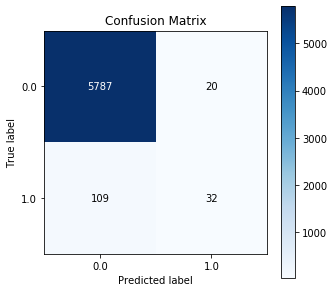

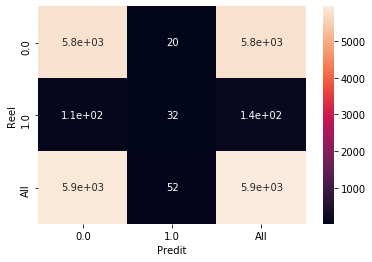

In [433]:
import scikitplot as skplt

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

def tab_result(df_a, df_b):
    # Extrait les matrices binaires en 1 seule colonne
    y_pred = pd.DataFrame(model0.predict(df_b)[:,1:])
    y_true = pd.DataFrame(df_a[:,1:])
    # création de la table
    dy = y_true.merge(y_pred, left_index=True, right_index=True, suffixes=('_true', '_pred'))
    dy['0_true'] = dy['0_true'].astype(int)
    dy['0_pred2'] = dy['0_pred'].round(0)   #arrondi à l'entier le + proche
    dy['diff'] = dy['0_true'] - dy['0_pred2']
    return dy

def lampe_results(df1, df2):
    df_10 = df1[df1['0_true'] == 0]
    df_11 = dy1[dy1['0_true'] == 1]
    df_20 = df2[df2['0_true'] == 0]
    df_21 = dy2[dy2['0_true'] == 1]
    return (df_10, df_11, df_20, df_21)

dy1 = tab_result(test_labels, test_data)
dy2 = tab_result(train_labels, train_data)
dy1.head(2)
dy2.head(2)
df_test_1, df_test_0, df_train_1, df_train_0 = lampe_results(dy1, dy2)

print(dy1.shape, dy2.shape)
print(df_test_1.shape, df_test_0.shape, df_train_1.shape, df_train_0.shape)
#print(df_test_0.describe())
true_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 1)].sum()
fals_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 0)].sum()
fals_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 1)].sum()
true_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 0)].sum()
print("\n ERREURS:", true_pos1, fals_pos1, fals_neg1, true_neg1)
#####################################
# sensitivity-recall : TPR = TP/P = TP / (TP + FN)
# specificity-select : TNR = TN/N = TN / (TN + FP)
# balance : = (TPR + TNR) / 2
# precision          : TP / (TP + FP)

# accuracy    : ACC = (TP + TN) / total
# FI score    :  2 * TP / (2 TP + FP + FN) == 2 / (1/precision + 1/recall)
#####################################


# calcul pour LOSS du Mean Squared Error
print("\n LOSS", mse_loss(y_reel, y_pred))

_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))
plt.show()

confusion_matrix(dy1['0_true'], dy1['0_pred2'])
sns.heatmap(df_confusion, annot=True)
plt.show()

# KERAS :  images bi-dimensionelles

### test séparation 

### tests

## Lecture des 3 fichiers de données

In [867]:
fichier1  = DATA_DIR3 + "data_LAS_nom_NUM_" + str(off) + ".npy"
data1     = np.load(fichier1)
fichier2  = DATA_DIR3 + "data_LAS_nom_ECA_" + str(off) + ".npy"
data2     = np.load(fichier2)
fichierY = DATA_DIR3 + "data_LAS_nom_POS_" + str(off) + ".npy"
data3    = np.load(fichierY)
#print(type(data1), type(data2))
print(data1.shape, data2.shape, data3.shape)

# concatenation de NUM et POS
data14 = tf.expand_dims(data1, 3)
data24 = tf.expand_dims(data2, 3)
data34 = tf.expand_dims(data1, 3)
print(data14.shape, data24.shape, data34.shape)

#data = tf.concat([data14, data24], 3)
data = tf.concat([data14, data24, data34], 3)
print(data.shape)

#data = data1
taille = data.shape[0]
print(taille)
data_y   = np.load(fichierY).reshape(taille,100)

print("Fichiers utilisés:\n", fichier1, " et\n", fichier2, "\n", data.shape)
print("Classification utiliseé:\n", fichierY, "\n", data_y.shape)

Nomb_Input = data.shape

(29384, 10, 10) (29384, 10, 10) (29384, 10, 10)
(29384, 10, 10, 1) (29384, 10, 10, 1) (29384, 10, 10, 1)
(29384, 10, 10, 3)
29384
Fichiers utilisés:
 C:\Users\STG3841\Mes Documents (local)\travail\data_LAS_nom_NUM_29384.npy  et
 C:\Users\STG3841\Mes Documents (local)\travail\data_LAS_nom_ECA_29384.npy 
 (29384, 10, 10, 3)
Classification utiliseé:
 C:\Users\STG3841\Mes Documents (local)\travail\data_LAS_nom_POS_29384.npy 
 (29384, 100)


In [870]:
# somme sur toutes les rangées ou colonnes   présence de valeurs SUPERIEURES A 1 (3x à 2 !!!)
df_Y = pd.DataFrame(data_y)
df_Y['lamp'] = df_Y.sum(axis=1)
df_Y['lamp2'] = df_Y[:-1].sum(axis=0)
print(df_Y.shape, df_Y['lamp'].sum())
print(df_Y.shape[0], len(df_Y[df_Y['lamp'] == 0]), df_Y[df_Y['lamp'] == 1].shape[0], df_Y[df_Y['lamp'] > 1].shape[0])
df_Y[df_Y['lamp'] == 2]

(29384, 102) 354.0
29384 29033 348 3


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,lamp,lamp2
29064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
29089,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
29265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN


In [866]:
# lampes0 autre DataFrame avec les indice de présence des lampadaires ... CORRECTS ? ... pas cohérent
df_tot = df_Y.merge(lampes0, left_index=True, right_index=True)
df_tot['diff'] = df_tot['present'] - df_tot['lamp']
print(df_tot.shape, lampes0.shape,df_Y.shape )

print(df_tot[df_tot['diff'] == 2].count(axis=0))
print(df_tot[df_tot['diff'] == 1].count(axis=0))
print(df_tot[df_tot['diff'] == 0].count(axis=0))
print(df_tot[df_tot['diff'] == -1].count(axis=0))
print(df_tot[df_tot['diff'] == -2].count(axis=0))
df_tot['diff'].describe()


(29384, 112) (40000, 9) (29384, 102)
0          0
1          0
2          0
3          0
4          0
          ..
Y          0
nom_NUM    0
nom_ECA    0
nom_POS    0
diff       0
Length: 112, dtype: int64
0          240
1          240
2          240
3          240
4          240
          ... 
Y          240
nom_NUM    240
nom_ECA    240
nom_POS    240
diff       240
Length: 112, dtype: int64
0          28801
1          28801
2          28801
3          28801
4          28801
           ...  
Y          28801
nom_NUM    28801
nom_ECA    28801
nom_POS    28801
diff       28801
Length: 112, dtype: int64
0          340
1          340
2          340
3          340
4          340
          ... 
Y          340
nom_NUM    340
nom_ECA    340
nom_POS    340
diff       340
Length: 112, dtype: int64
0          3
1          3
2          3
3          3
4          3
          ..
Y          3
nom_NUM    3
nom_ECA    3
nom_POS    3
diff       3
Length: 112, dtype: int64


count    29384.000000
mean        -0.003607
std          0.141897
min         -2.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diff, dtype: float64

In [865]:
df_tot[df_tot['diff'] == 1]

,0,1,2,3,4,5,6,7,8,9,...,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS,diff
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,52,52,0,2042500,7272260,2042500_7272260_NumPoints5m.tif,2042500_7272260_EcartZ5m.tif,2042500_7272260_Position5m.tif,1.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,92,92,0,2042500,7272460,2042500_7272460_NumPoints5m.tif,2042500_7272460_EcartZ5m.tif,2042500_7272460_Position5m.tif,1.0
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,170,170,0,2042500,7272850,2042500_7272850_NumPoints5m.tif,2042500_7272850_EcartZ5m.tif,2042500_7272850_Position5m.tif,1.0
249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,249,49,1,2042505,7272245,2042505_7272245_NumPoints5m.tif,2042505_7272245_EcartZ5m.tif,2042505_7272245_Position5m.tif,1.0
281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,281,81,1,2042505,7272405,2042505_7272405_NumPoints5m.tif,2042505_7272405_EcartZ5m.tif,2042505_7272405_Position5m.tif,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,28858,58,144,2043220,7272290,2043220_7272290_NumPoints5m.tif,2043220_7272290_EcartZ5m.tif,2043220_7272290_Position5m.tif,1.0
28859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,28859,59,144,2043220,7272295,2043220_7272295_NumPoints5m.tif,2043220_7272295_EcartZ5m.tif,2043220_7272295_Position5m.tif,1.0
28867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,28867,67,144,2043220,7272335,2043220_7272335_NumPoints5m.tif,2043220_7272335_EcartZ5m.tif,2043220_7272335_Position5m.tif,1.0
28871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,28871,71,144,2043220,7272355,2043220_7272355_NumPoints5m.tif,2043220_7272355_EcartZ5m.tif,2043220_7272355_Position5m.tif,1.0


In [861]:
df_Y.describe()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,lamp,lamp2
count,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,...,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,100.000000
mean,0.000238,0.000102,0.000204,0.000102,0.000034,0.000034,0.000068,0.000170,0.000204,0.000204,...,0.000136,0.000136,0.000204,0.000068,0.000204,0.000102,0.000204,0.000034,0.012047,3.530000
std,0.015433,0.010104,0.014288,0.010104,0.005834,0.005834,0.008250,0.013044,0.014288,0.014288,...,0.011667,0.011667,0.014288,0.008250,0.014288,0.010104,0.014288,0.005834,0.110031,1.914617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000


### Séparation Train - Test 

In [871]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
###############   TODO      ###############
####### fonctionne avec les 2 cubes/images 
X = data
####### Si Ne fonctionne pas avec les 2 cubes/images 
# X = data1
print("Dimensions X:", X.shape)
##############################################
#####   calcul de la position de la lampe dans le carré N
###  Passage mode binaire à une liste de 100
############
# Manière 1 de 
y = liste_y
# Manière 2 ... directe à partir des 3 mêmes fichiers 10x10
y = df_Y['lamp']

y_binary = to_categorical(y)
print("Dimensions Y:", y_binary.shape, len(y))
#
# y = data_y
# print(y.shape)
#############################

# tfds   tensorflow dataset splitting
# test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])
# PYTORCH   torchtext.data.Dataset
# split(split_ratio=0.7, stratified=False, strata_field='label', random_state=None

methode = 'test2'
#methode = 'SKLEARN'

if methode == 'test':
    all = tf.data.Dataset.from_tensor_slices(X).shuffle(10, reshuffle_each_iteration=False)
    n_row = int(X.shape[0] * 0.8)
    train_data, test_data     = X[:n_row,:,:,:], X[n_row:,:,:,:]
    train_labels, test_labels = y_binary[:n_row,:], y_binary[n_row:,:]
    
if methode == 'test2':
    n_row1 = int(X.shape[0] * 0.8)
    n_row2 = X.shape[0] - n_row1
    train_data, test_data = tf.split(X, [n_row1, n_row2], 0)
    train_labels, test_labels = tf.split(X, [n_row1, n_row2], 0)
    
if methode == 'shuffle':
    fraction = 20
    #all = tf.data.Dataset.from_tensor_slices(list(range(1, 21))).shuffle(10, reshuffle_each_iteration=False)
    #test_data = all.enumerate().filter(lambda x,y: x % int(100/fraction) == 0).map(lambda x,y: y)
    
# Avec SKLEARN
if methode == 'SKLEARN':
    train_data, test_data, train_labels, test_labels = train_test_split(
        X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#        X, y, test_size=0.2, random_state=42, stratify=y)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print("Train et Test:", train_data.shape, len(train_labels), test_data.shape, len(test_labels))

#train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)

#### Ce n'est plus nécessaire si X est un Tenseur 4D
#train_data = train_data.reshape(train_data.shape[0], 10, 10, 1)
#test_data  = test_data.reshape(test_data.shape[0], 10, 10, 1)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(train_data.shape, len(train_labels), test_data.shape, len(test_labels))


Dimensions X: (29384, 10, 10, 3)
Dimensions Y: (29384, 3) 29384
Train et Test: (23507, 10, 10, 3) 23507 (5877, 10, 10, 3) 5877
(23507, 10, 10, 3) 23507 (5877, 10, 10, 3) 5877


In [ ]:
print(pd.DataFrame(train_labels).describe())
print(pd.DataFrame(test_labels).describe())

## Modèles CNN 2D

In [768]:
# 2) Train CONVNET on the MNIST dataset
dim = len(keras.backend.int_shape(train_data))

epochs = 10
#  steps PROBLEMES si différent de 1 pour les derniers plots
batch_size = 1   
ratio = 10 * 401 / 70
poids_class = {0: 1., 1: ratio}
if dim == 2:
    input_shape = (10, 10)
if dim == 4:
    input_shape = (10, 10, 2)


filters = (5,5)
strides=(1,1)
pool_size=(2,2)

model2 = Sequential([
    Conv2D(16, filters, padding="same", strides=strides, input_shape=input_shape),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(16, filters, padding="same", strides=strides),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(120, activation='relu'),
    #Dropout(0.1),
    Dense(100, activation='relu'),
    #Dropout(0.1),
    Dense(2, activation='softmax')
])

#model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])
model2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#  si TENSOR = 2D
if dim == 2:
    history2 = model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, 
                          class_weight=poids_class,  #class_weight='balanced',
          verbose=1, validation_data=(test_data, test_labels))
    score = model2.evaluate(test_data, test_labels, verbose=0)
elif dim == 4:
    history2 = model2.fit(train_data, train_labels, epochs=epochs, class_weight=poids_class, verbose=1,
                        validation_freq=.33, steps_per_epoch=5)
    score = model2.evaluate(test_data, test_labels, steps=5, verbose=0)
else:
    print("WRONG tensor dimension inputs ....")



print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
5/5 [==============================] - ETA: 3s - loss: 0.6565 - accuracy: 0.62 - ETA: 1s - loss: 0.5573 - accuracy: 0.81 - ETA: 0s - loss: 0.4815 - accuracy: 0.87 - ETA: 0s - loss: 0.4196 - accuracy: 0.90 - 2s 366ms/step - loss: 0.3691 - accuracy: 0.9256
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 0.1233 - accuracy: 1.00 - ETA: 0s - loss: 0.1088 - accuracy: 1.00 - ETA: 0s - loss: 0.0973 - accuracy: 1.00 - ETA: 0s - loss: 0.0879 - accuracy: 1.00 - 1s 215ms/step - loss: 0.0800 - accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 1.00 - ETA: 0s - loss: 0.0370 - accuracy: 1.00 - ETA: 0s - loss: 0.0343 - accuracy: 1.00 - ETA: 0s - loss: 0.0318 - accuracy: 1.00 - 1s 211ms/step - loss: 0.0297 - accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 1.00 - ETA: 0s - loss: 0.0175 - accuracy: 1.00 - ETA: 0s - loss: 0.0165 - accuracy: 1.00 - ETA: 0s - loss: 0.0156 - a

### Sommaire

In [769]:
model2.summary()

# model.save_weights('file.h5')
# avec le model construit + les poids
# model.load_weights('file.h5')

Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_265 (Conv2D)          (None, 10, 10, 16)        816       
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_266 (Conv2D)          (None, 5, 5, 16)          6416      
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_120 (Flatten)        (None, 64)                0         
_________________________________________________________________
dense_296 (Dense)            (None, 120)               7800      
_________________________________________________________________
dense_297 (Dense)            (None, 100)            

### Figures

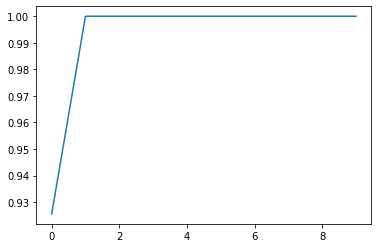

In [770]:
#history0.history
# plot metrics
#_ = plt.plot(history2.history['binary_accuracy'])
_ = plt.plot(history2.history['accuracy'])
_ = plt.show()

dict_keys(['loss', 'accuracy'])


IndexError: list index out of range

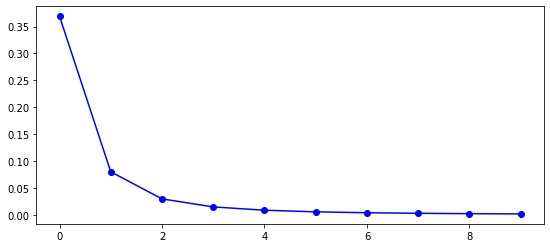

In [771]:
print(history2.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    _ = plt.plot(list(history2.history.values())[i],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history2.history.values())[j],'k-o', color=coul[j])

Test loss: 1.0913653373718262
Test accuracy: 2.5265392661094666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


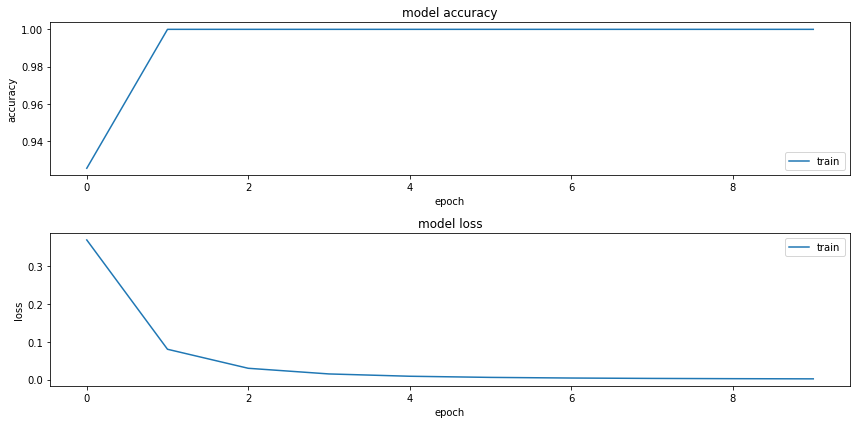

In [772]:
# RESULTATS

if dim == 2:
    score = model2.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
    classes = model2.predict(test_data, batch_size=batch_size)
    predictions = model2.predict(test_data[:10])
if dim == 4:
    score = model2.evaluate(test_data, test_labels, verbose=0, steps=batch_size)
    classes = model2.predict(test_data, steps=batch_size)
    predictions = model2.predict(test_data[:10], steps=batch_size)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
 #predictions = model2.predict_classes(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,0])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history2.history['accuracy'])
if dim == 2:
    _ = plt.plot(history2.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history2.history['loss'])
if dim == 2:
    _ = plt.plot(history2.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de confusion

In [773]:
print(test_data.shape)

(471, 10, 10, 2)


Echantillon Train: (1881, 10, 10, 2) 1881 18810
Echantillon Test: 471 4710

 Predit_test  0.0  All
Reel_test            
0.0          119  119
1.0          352  352
All          471  471


ValueError: Found input variables with inconsistent numbers of samples: [471, 4710]

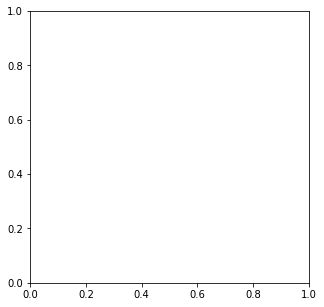

In [774]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
if dim == 2:
    Y01 = pd.DataFrame(model2.predict(train_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
    Y11 = pd.DataFrame(model2.predict(test_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
if dim == 4:
    Y01 = pd.DataFrame(model2.predict(train_data, steps=batch_size)[:,1:2])[0].round(0).tolist()
    Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
    Y11 = pd.DataFrame(model2.predict(test_data, steps=batch_size)[:,1:2])[0].round(0).tolist()
    Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()

print("Echantillon Train:", train_data.shape, len(Y00), len(Y01))
#confusion_matrix(Y01, Y00)

print("Echantillon Test:", len(Y10), len(Y11))
#confusion_matrix(Y11, Y10)

y_reel = pd.Series(Y10, name='Reel_test')
y_pred = pd.Series(Y11, name='Prédit_test')
df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel_test'], colnames=['Predit_test'], margins=True)
print("\n", df_confusion)
#
skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))
plt.show()
#
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print("\n", df_conf_norm)
df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print("\n", df_conf_norm)

_ = sns.heatmap(df_confusion, annot=True)
plt.show()
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

# KERAS hyperparametres

In [301]:
from sklearn.model_selection import GridSearchCV

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

def create_model(neurons=1, optimizer='adam', dropout_rate=0.0, learn_rate=0.01, momentum=0, 
                 init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode, input_dim=8, activation=activation)'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)
# load dataset

dataset = 
# split into input (X) and output (Y) variables
X = dataset
Y = dataset

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, dropout_rate=0.2, verbose=0)

              
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [i for i in range (1, 6, 1)]
dropout_rate = [i/10 for i in range (0, 10, 1)]
neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum, optimizer=optimizer, 
                init_mode=init_mode, batch_size=batch_size, epochs=epochs, activation=activation,
                dropout_rate=dropout_rate, weight_constraint=weight_constraint)
#  score = ???
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)   # n_jobs=-1  parallisation
grid_result = grid.fit(X, Y)

# summarize results ==>  best_score et best_params_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

SyntaxError: invalid syntax (<ipython-input-301-ded477e1019e>, line 19)